<a href="https://colab.research.google.com/github/jaden-2/Assignment/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import imdb
from keras.utils import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, GRU, LSTM, ConvLSTM2D, Conv3D, BatchNormalization
from matplotlib import pyplot as plt
import numpy as np

In [8]:
vocab_size = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [9]:
max_lenght = 200
embedding_size = 128

x_train = pad_sequences(x_train, max_lenght, padding="post")
x_test = pad_sequences(x_test, maxlen=max_lenght, padding="post")

## Problem 1

### SimpleRNN

In [10]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, "sigmoid"))

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Recall", "Precision"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2593025 (9.89 MB)
Trainable params: 2593025 (9.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, 32, epochs=1)

782/782 [==============================] - 237s 301ms/step - loss: 0.7026 - accuracy: 0.5046 - recall: 0.5071 - precision: 0.5045


In [13]:
model.evaluate(x_test, y_test, 32)

782/782 [==============================] - 15s 19ms/step - loss: 0.6960 - accuracy: 0.5078 - recall: 0.8437 - precision: 0.5047


[0.6960158348083496,
 0.5078399777412415,
 0.8436800241470337,
 0.5046898722648621]

### GRU

In [14]:
g_model = Sequential()

g_model.add(Embedding(vocab_size, embedding_size))
g_model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
g_model.add(Dense(1, "sigmoid"))



In [15]:
g_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
g_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2659201 (10.14 MB)
Trainable params: 2659201 (10.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
g_model.fit(x_train, y_train, 20, 1)

1250/1250 [==============================] - 471s 375ms/step - loss: 0.5378 - accuracy: 0.6840


In [17]:
g_model.evaluate(x_test, y_test, 32)

782/782 [==============================] - 48s 61ms/step - loss: 0.2984 - accuracy: 0.8730


[0.298393189907074, 0.8730000257492065]

### LSTM

In [18]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_size))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, "sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2659201 (10.14 MB)
Trainable params: 2659201 (10.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, 20, 1)

1250/1250 [==============================] - 470s 374ms/step - loss: 0.6149 - accuracy: 0.6402


In [20]:
model.evaluate(x_test, y_test, 32)

782/782 [==============================] - 48s 62ms/step - loss: 0.4009 - accuracy: 0.8267


[0.40093734860420227, 0.8266800045967102]

### ConvLSTM2d

In [22]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float_)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float_)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

noisy_movies, shifted_movies = generate_movies(n_samples=1200)

In [27]:

conv_model = Sequential()

conv_model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), input_shape=(None, 40, 40, 1), padding="same", return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
conv_model.add(BatchNormalization())
conv_model.add(Conv3D(1, kernel_size=(3, 3, 3), data_format="channels_last", padding="same", activation="sigmoid"))

conv_model.compile(optimizer="adadelta", loss="binary_crossentropy")
conv_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_20 (ConvLSTM2D  (None, None, 40, 40, 40   59200     
 )                           )                                   
                                                                 
 batch_normalization_20 (Ba  (None, None, 40, 40, 40   160       
 tchNormalization)           )                                   
                                                                 
 conv_lstm2d_21 (ConvLSTM2D  (None, None, 40, 40, 40   115360    
 )                           )                                   
                                                                 
 batch_normalization_21 (Ba  (None, None, 40, 40, 40   160       
 tchNormalization)           )                                   
                                                                 
 conv_lstm2d_22 (ConvLSTM2D  (None, None, 40, 40, 40  

In [28]:
conv_model.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,epochs=1, validation_split=0.05)

10/10 [==============================] - 65s 775ms/step - loss: 0.8425 - val_loss: 0.6976


1/1 [==============================] - 0s 211ms/step


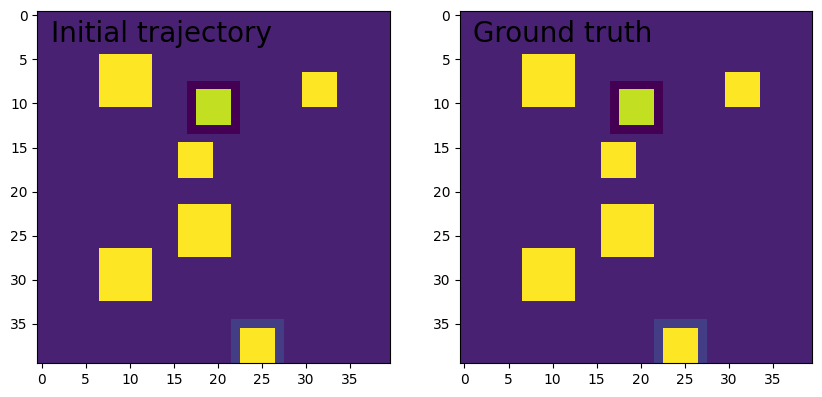

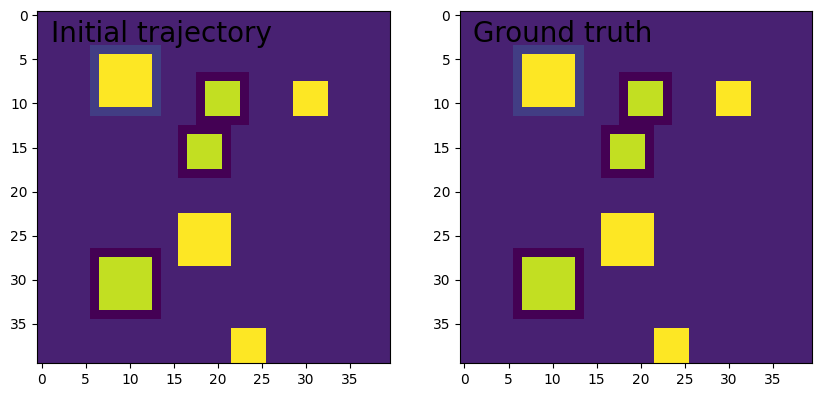

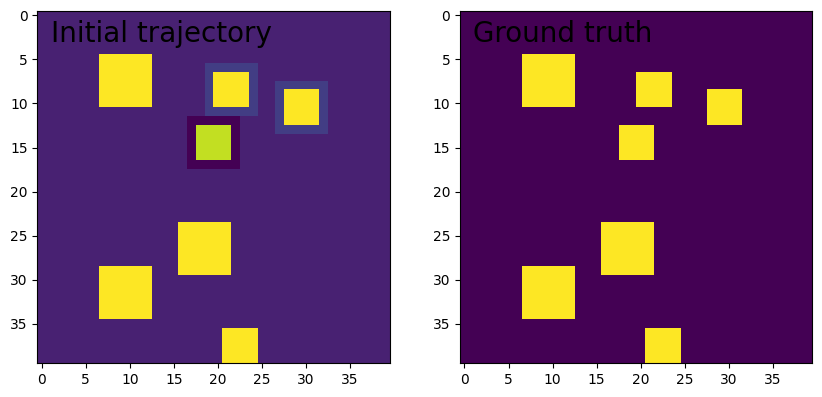

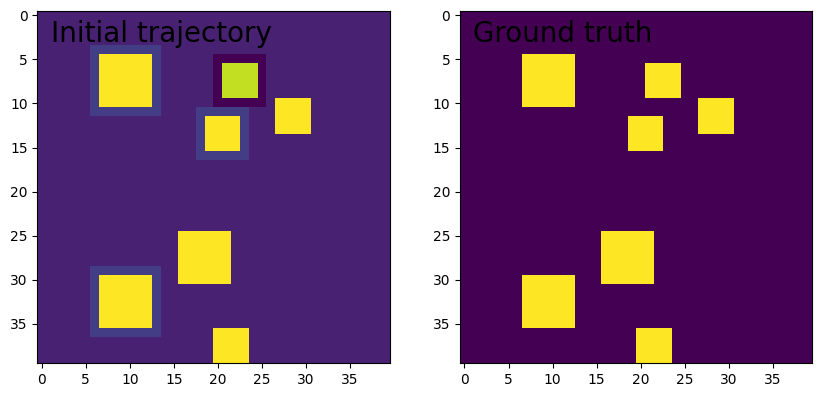

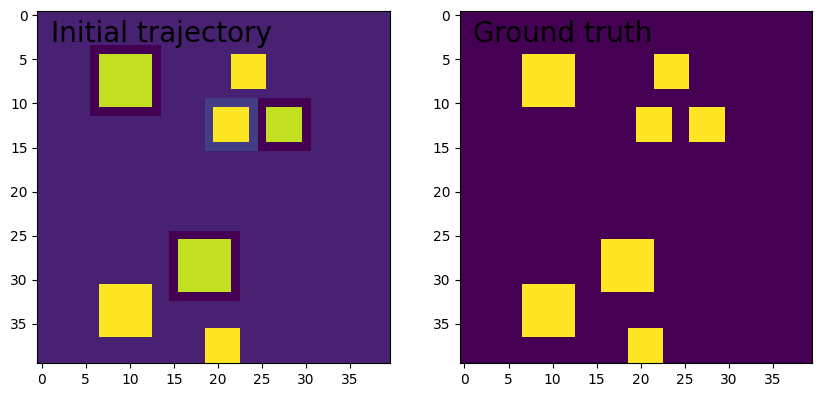

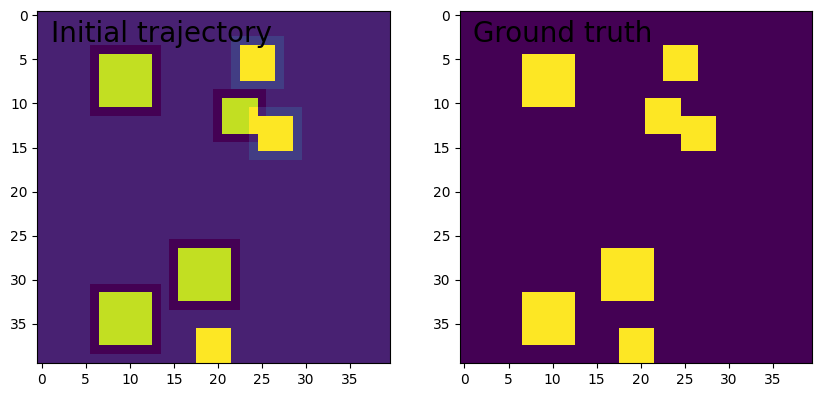

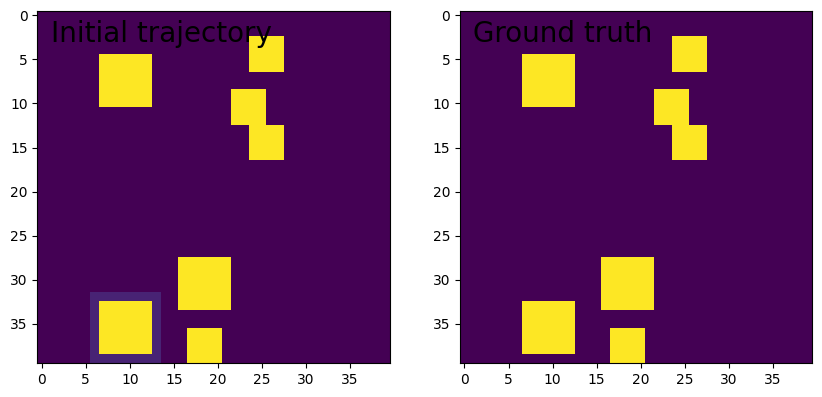

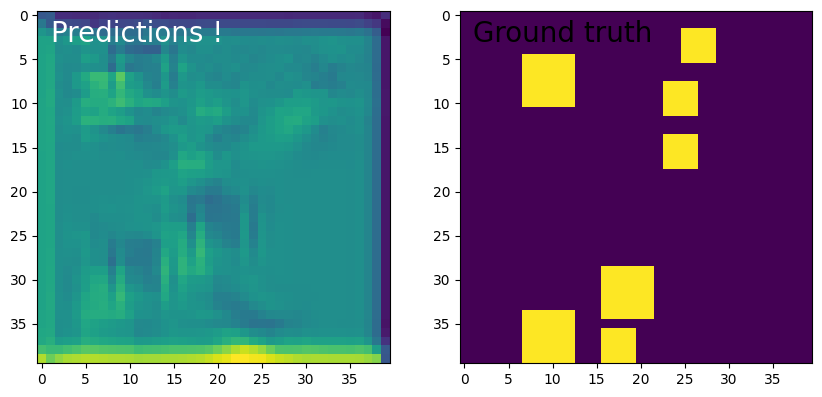

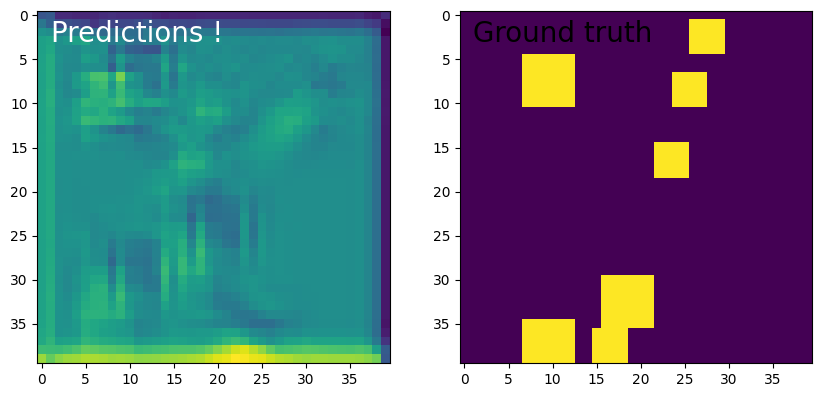

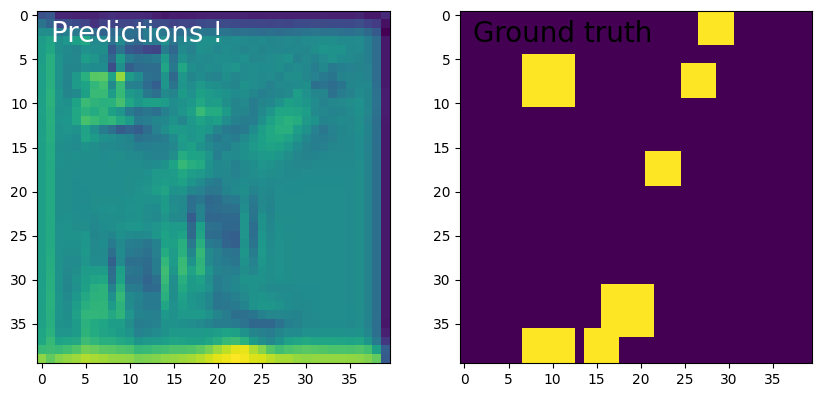

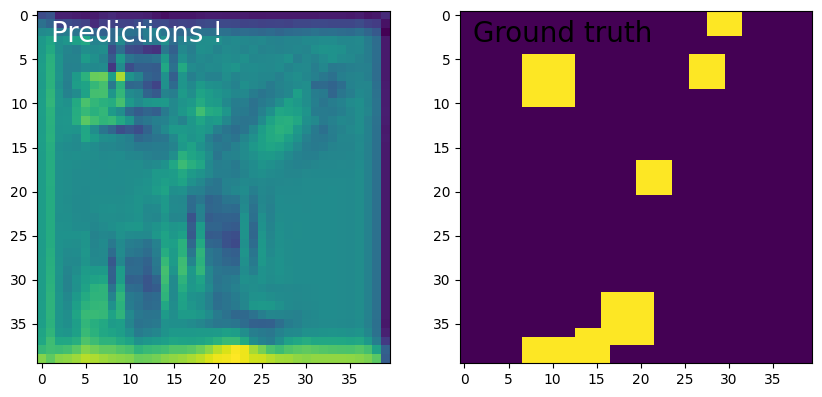

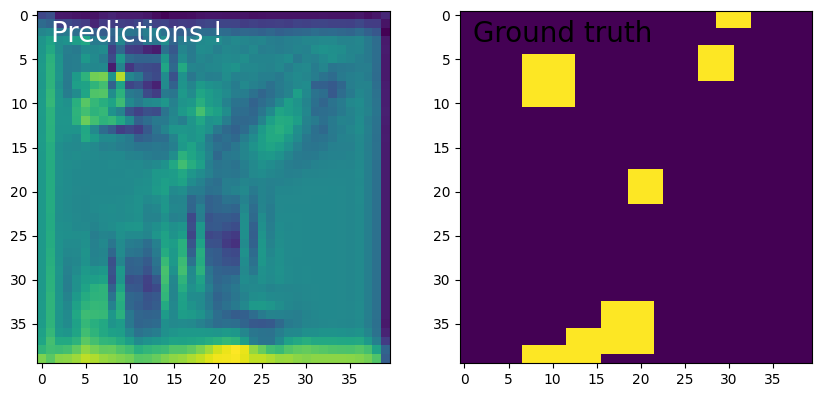

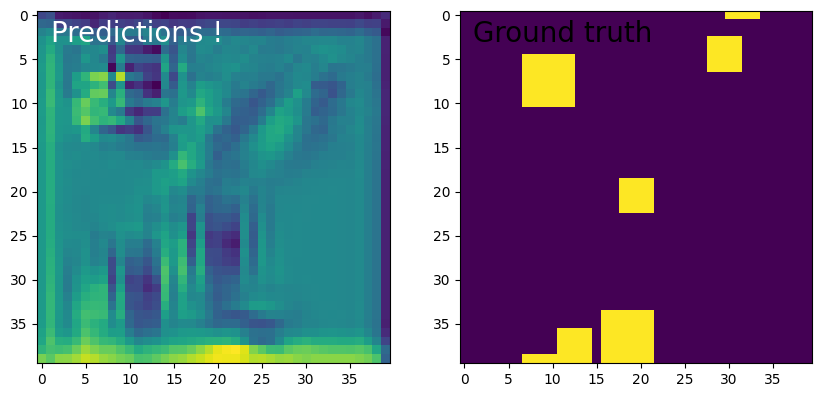

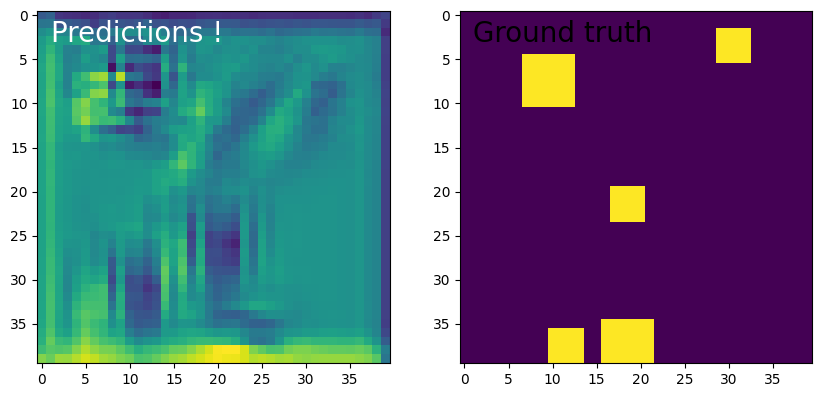

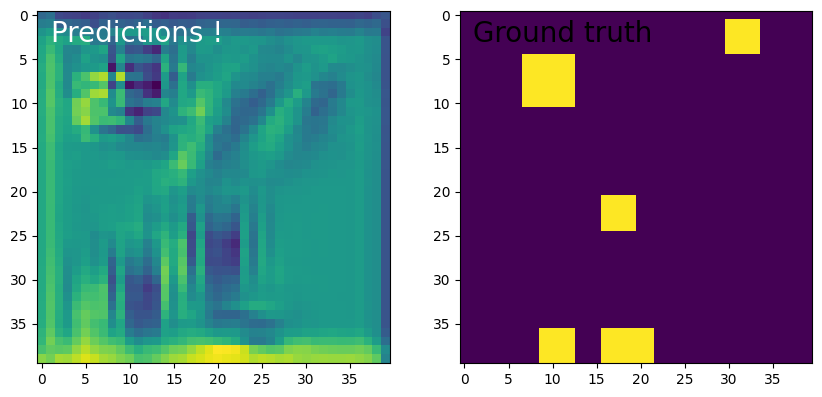

In [29]:
index = 1004
track = noisy_movies[index][:7, ::, ::, ::]
track2 = noisy_movies[index][::, ::, ::, ::]
for j in range(16):
    new_pos = conv_model.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[index][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## Problem 3

<table >
<th>
<td>Model</td>
<td>Description</td>
</th>

<tr>
<td>1</td>
<td>RNN</td>
<td>Base class for all recurrent layers. Used for creating custom RNN layers with single or multiple cells.</td>
</tr>

<tr>
<td>2</td>
<td>SimpleRNNCell</td>
<td>Represents a single cell for a SimpleRNN layer. Mainly used for custom RNN implementations.</td>
</tr>

<tr>
<td>3</td>
<td>GRUCell</td>
<td>Represents a single cell for a GRU layer. Used for custom RNN implementations</td>
</tr>

<tr>
<td>4</td>
<td>LSTMCell</td>
<td>Represents a single cell for an LSTM layer. Used for custom RNN implementations.</td>
</tr>

<tr>
<td>5</td>
<td>StackedRNNCells</td>
<td>Combines multiple RNN cells into a single stacked cell. Useful for creating deep RNNs.</td>
</tr>

<tr>
<td>6</td>
<td>CuDNNGRU</td>
<td> Optimized GRU layer using NVIDIA's CuDNN for faster GPU performance. Less flexible than the standard GRU layer.</td>
</tr>

<tr>
<td>7</td>
<td>CuDNNLSTM</td>
<td>  Optimized LSTM layer using NVIDIA's CuDNN for faster GPU performance. Less flexible than the standard LSTM layer.</td>
</tr>
</table>